#Importación de bibliotecas

In [4]:
# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os


In [5]:
#Función para exportar
#def eda_and_cleaning(stroke_dataset, clean_data):

#Importación del dataset

In [6]:
raw_dataset = pd.read_csv("stroke_dataset.csv")
print(f"Tamaño del dataset: {raw_dataset.shape}")
print(f"\nInformacion del dataset:\n")
raw_dataset.info()

Tamaño del dataset: (4981, 11)

Informacion del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB



#Filtrado por Edad +18

In [7]:

print("\n2. Eliminados datos de  menores de 18 años")
data = raw_dataset[raw_dataset['age'] >= 18]
print(f"Tamaño del dataset después del filtrado: {data.shape}")




2. Eliminados datos de  menores de 18 años
Tamaño del dataset después del filtrado: (4158, 11)


#Análisis inicial del dataset filtrado


In [8]:
print(f"\nInformacion del dataset +18:\n")
data.info()


Informacion del dataset +18:

<class 'pandas.core.frame.DataFrame'>
Index: 4158 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4158 non-null   object 
 1   age                4158 non-null   float64
 2   hypertension       4158 non-null   int64  
 3   heart_disease      4158 non-null   int64  
 4   ever_married       4158 non-null   object 
 5   work_type          4158 non-null   object 
 6   Residence_type     4158 non-null   object 
 7   avg_glucose_level  4158 non-null   float64
 8   bmi                4158 non-null   float64
 9   smoking_status     4158 non-null   object 
 10  stroke             4158 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 389.8+ KB


In [9]:
# Estadística descriptiva general
print("\nEstadísticas descriptivas:")
print(data.describe().astype(int))


Estadísticas descriptivas:
        age  hypertension  heart_disease  avg_glucose_level   bmi  stroke
count  4158          4158           4158               4158  4158    4158
mean     50             0              0                108    29       0
std      17             0              0                 47     6       0
min      18             0              0                 55    14       0
25%      36             0              0                 77    25       0
50%      51             0              0                 92    29       0
75%      64             0              0                115    33       0
max      82             1              1                271    48       1


In [10]:
#valores vacios
print("\nValores faltantes por columna:")
print(data.isnull().sum())


Valores faltantes por columna:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [11]:
print(data.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


#Valores desconocidos


In [12]:
data = data[data['smoking_status'] != 'Unknown']

# Mostrar información después de la eliminación
print("\nInformación después de eliminar 'Unknown':")
print(data['smoking_status'].value_counts())
print(f"Total de filas: {len(data)}")



Información después de eliminar 'Unknown':
smoking_status
never smoked       1710
formerly smoked     842
smokes              767
Name: count, dtype: int64
Total de filas: 3319


#convertir variables


In [13]:
data = pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])  # Replace with your actual categorical columns


#Distribución variable objetivo "Stroke"



Distribución de la variable objetivo (stroke):
stroke
No    3118
Sí     201
Name: count, dtype: int64

Porcentajes:
No Stroke: 93.94%
Stroke: 6.06%


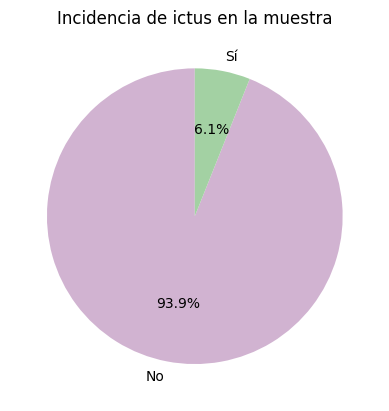

In [14]:
#Variable objetivo

print("\nDistribución de la variable objetivo (stroke):")

stroke_counts = data['stroke'].value_counts()
stroke_counts = data['stroke'].replace({1: 'Sí', 0: 'No'}).value_counts()
stroke_percentages = data['stroke'].value_counts(normalize=True) * 100
print(stroke_counts)
print(f"\nPorcentajes:\nNo Stroke: {stroke_percentages[0]:.2f}%\nStroke: {stroke_percentages[1]:.2f}%")



plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', startangle=90, colors=['#D1B3D1','#A3D1A3'])

plt.title('Incidencia de ictus en la muestra')
plt.show()

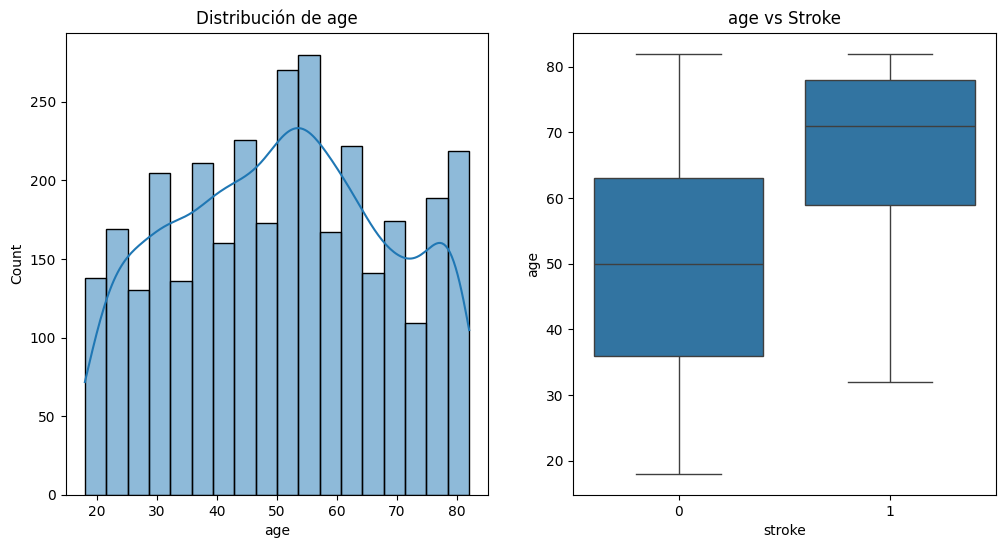


Prueba t para age:
Estadístico t: 14.98525800435515, Valor p: 3.598198677281782e-49
La diferencia en age entre los grupos de stroke y no-stroke es significativa (p < 0.05).


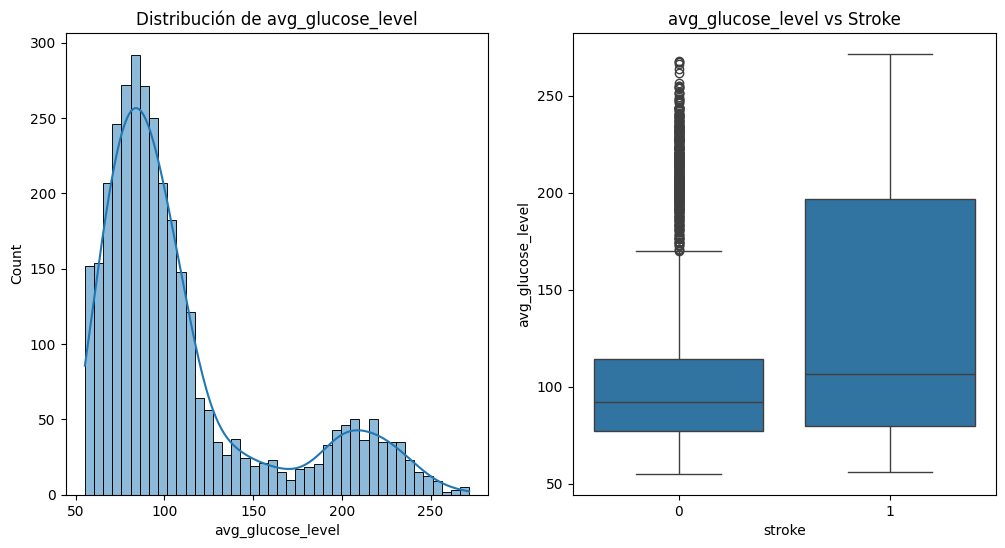


Prueba t para avg_glucose_level:
Estadístico t: 7.461400622054465, Valor p: 1.0874980802286519e-13
La diferencia en avg_glucose_level entre los grupos de stroke y no-stroke es significativa (p < 0.05).


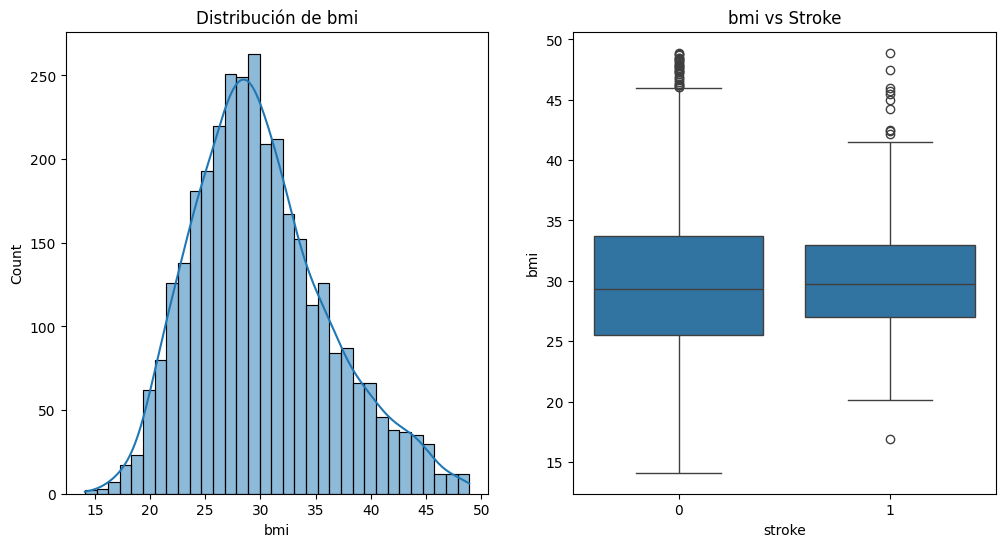


Prueba t para bmi:
Estadístico t: 0.8708443976820406, Valor p: 0.38390213972777576
La diferencia en bmi entre los grupos de stroke y no-stroke NO es significativa (p >= 0.05).


In [15]:
#Análisis de variables numéricas con prueba t
numeric_cols = ['age', 'avg_glucose_level', 'bmi']
for col in numeric_cols:
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.subplot(122)
    sns.boxplot(x='stroke', y=col, data=data)
    plt.title(f'{col} vs Stroke')
    plt.show()

    stroke_group = data[data['stroke'] == 1][col]
    no_stroke_group = data[data['stroke'] == 0][col]
    t_stat, p_value = stats.ttest_ind(stroke_group, no_stroke_group)

    print(f"\nPrueba t para {col}:")
    print(f"Estadístico t: {t_stat}, Valor p: {p_value}")
    if p_value < 0.05:
        print(f"La diferencia en {col} entre los grupos de stroke y no-stroke es significativa (p < 0.05).")
    else:
        print(f"La diferencia en {col} entre los grupos de stroke y no-stroke NO es significativa (p >= 0.05).")


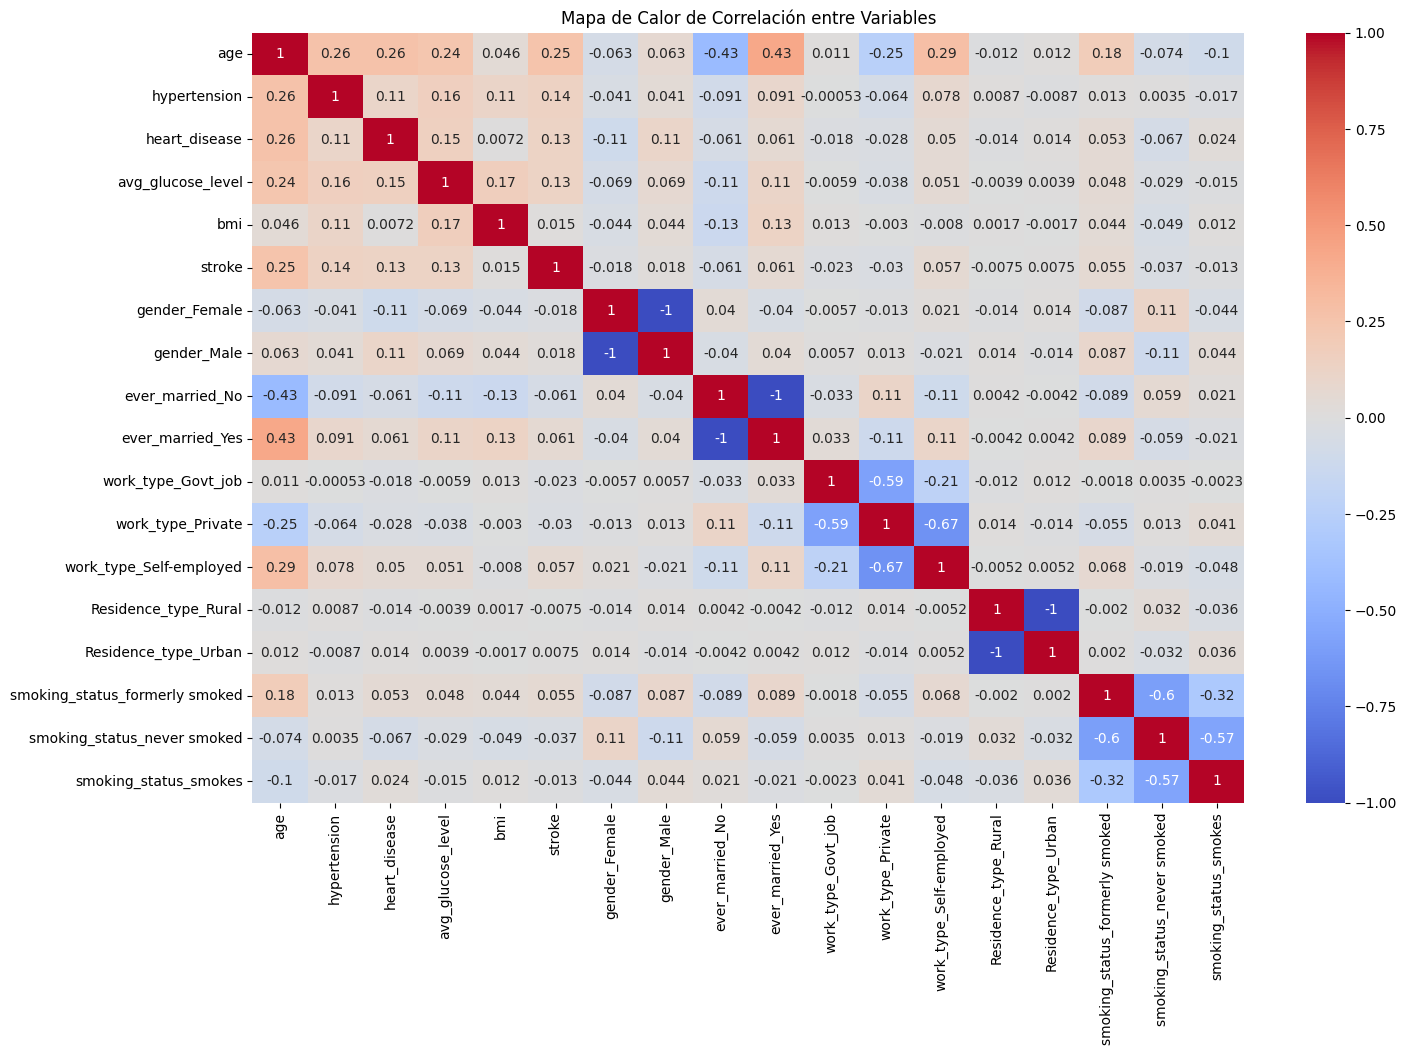

In [16]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación entre Variables')
plt.show()


#dataset limpio


In [17]:
 output_path = 'clean_data.csv'
 data.to_csv(output_path, index=False)

In [18]:
#eda_and_cleaning('stroke_dataset.csv', 'clean_data.csv')